In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ! pip install matplotlib==3.4

In [3]:
import matplotlib
matplotlib.__version__

'3.4.0'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Autoimmune_Disease/Independent Study/output/ballancing_aproach_testing_output.csv')

In [5]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','process_approach','imputation','patient_group','drug_group','train_test_rate','remove_low_DAS','random_state'])
df

,dataset,challenge,balance_class,model_id,MAE,MSE,RMSE,R2,Pearson_Correlation,Accuracy,F1-Score
0,validation,regression,0,Linear,0.930566,1.246612,1.116518,0.003795,0.277477,0.419355,0.418301
1,validation,regression,0,Linear,1.071997,1.989664,1.410554,-0.177066,0.274425,0.387097,0.291005
2,validation,regression,0,Linear,0.939887,1.242882,1.114846,0.201275,0.503601,0.354839,0.362600
3,validation,regression,0,Linear,0.781254,0.932337,0.965576,0.220956,0.478405,0.419355,0.297683
4,validation,regression,0,Linear,1.137415,1.990417,1.410821,0.112169,0.350434,0.333333,0.310849
...,...,...,...,...,...,...,...,...,...,...,...
4459,test,classification,2,Random Forest,NaN,NaN,NaN,NaN,NaN,0.494118,0.477877
4460,test,classification,2,Tree,NaN,NaN,NaN,NaN,NaN,0.447059,0.445534
4461,test,classification,2,Boosting Logistic,NaN,NaN,NaN,NaN,NaN,0.482353,0.470962
4462,test,classification,2,Bagging Logistic,NaN,NaN,NaN,NaN,NaN,0.447059,0.429167


In [67]:
df['challenge'].value_counts()

regression                 930
regression_delta           930
regression_delta_binary    930
binary_classification      837
classification             837
Name: challenge, dtype: int64

In [58]:
def filter_data(rank_metrix, challenge, topk):
  if rank_metrix in ['MAE','MSE','RMSE']:
    ranking_ascending = True
  elif rank_metrix in ['R2','Pearson_Correlation','Accuracy','F1-Score']:
    ranking_ascending = False

  top_k = df[(df['challenge'].isin([challenge])) 
  & (df['balance_class']==1) 
  & (df['dataset']=='validation')].groupby('model_id').mean().sort_values(by=[rank_metrix],ascending=ranking_ascending)
  # print(top_k)
  top_k_error = df[(df['challenge'].isin([challenge])) 
  & (df['balance_class']==1) 
  & (df['dataset']=='validation')].groupby('model_id').std()

  # test 
  selected_models = list(top_k.index)
  test = df[(df['challenge'].isin([challenge])) 
  & (df['balance_class']==1) 
  & (df['dataset']=='test')].groupby('model_id').mean()
  test = test.loc[selected_models]
  # print('test', test)

  top_k_error = top_k_error.loc[selected_models]
  return top_k[:topk], top_k_error[:topk], test[:topk]

In [172]:
def error_bar_plot(top_k, top_k_error, evaluation_metrics):
  x = list(top_k.index)
  y = top_k[evaluation_metrics]
  y_1 = [round(a,2) for a in y]
  y_error = top_k_error[evaluation_metrics]
  y_perc = [round(a*100,1) for a in y]

  fig, ax = plt.subplots()

  if evaluation_metrics == 'MSE':
    ax.set_ylim(0,max(y+y_error)+0.5)
    bars = ax.bar(x,y_1)
  elif evaluation_metrics == 'Accuracy':
    ax.set_ylim(50,100)
    bars = ax.bar(x,y_perc)
  else:
    bars = ax.bar(x,y)

  ax.bar_label(bars)
  ax.set_ylabel(evaluation_metrics)

  ax.errorbar(x, y, yerr=y_error,
              fmt='o', color='orange', ecolor='orange',
              elinewidth = 3, capsize=10)

In [173]:
def test_plot(test, evaluation_metrics):
  x = list(test.index)
  y = test[evaluation_metrics]
  y_1 = [round(a,2) for a in y]
  y_perc = [round(a*100,1) for a in y]

  fig, ax = plt.subplots()

  if evaluation_metrics == 'MSE':
    ax.set_ylim(0,max(y)+0.5)
    bars = ax.bar(x,y_1)
  elif evaluation_metrics == 'Accuracy':
    ax.set_ylim(50,100)
    bars = ax.bar(x,y_perc)
  else:
    bars = ax.bar(x,y)

  ax.bar_label(bars)
  ax.set_ylabel(evaluation_metrics)

In [ ]:
# def generate_report():
#   for metrics in ['MSE','Pearson_Correlation','Accuracy','']

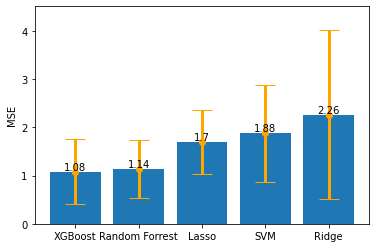

In [182]:
top_k, top_k_error, test = filter_data(rank_metrix='MSE',challenge='regression_delta_binary',topk=5)
error_bar_plot(top_k, top_k_error, 'MSE')

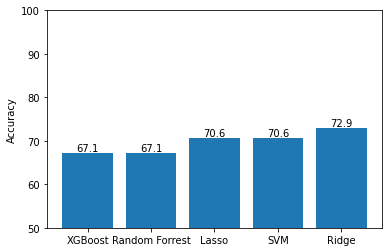

In [183]:
test_plot(test,'Accuracy')

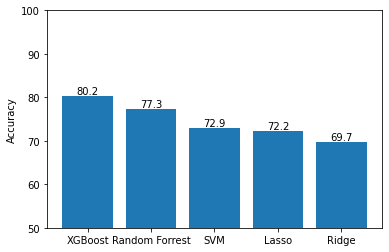

In [176]:
top_k, top_k_error, test = filter_data(rank_metrix='Accuracy',challenge='regression_delta_binary',topk=5)
error_bar_plot(top_k, top_k_error, 'Accuracy')

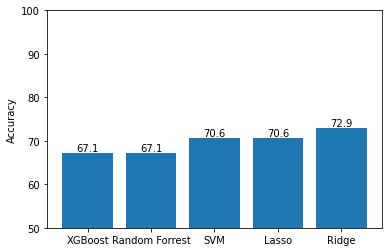

In [177]:
test_plot(test,'Accuracy')

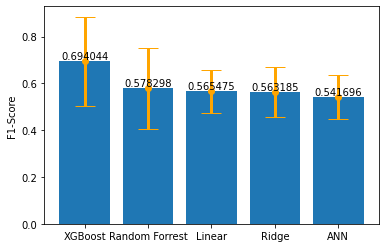

In [185]:
top_k, top_k_error, test = filter_data(rank_metrix='F1-Score',challenge='regression_delta_binary',topk=5)
error_bar_plot(top_k, top_k_error, 'F1-Score')

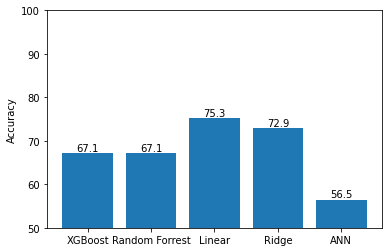

In [186]:
test_plot(test,'Accuracy')

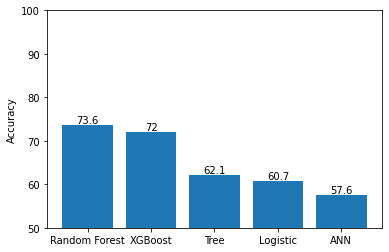

In [180]:
top_k, top_k_error, test = filter_data(rank_metrix='Accuracy',challenge='binary_classification',topk=5)
error_bar_plot(top_k, top_k_error, 'Accuracy')

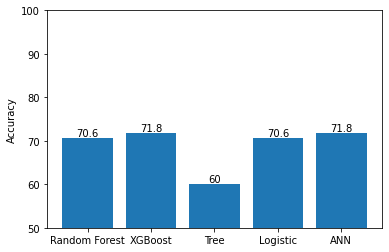

In [181]:
test_plot(test,'Accuracy')

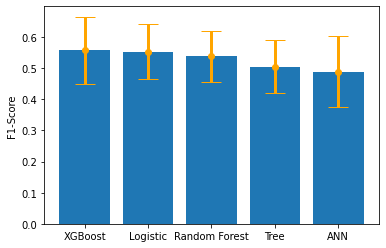

In [106]:
top_k, top_k_error, test = filter_data(rank_metrix='F1-Score',challenge='binary_classification',topk=5)
error_bar_plot(top_k, top_k_error, 'F1-Score')

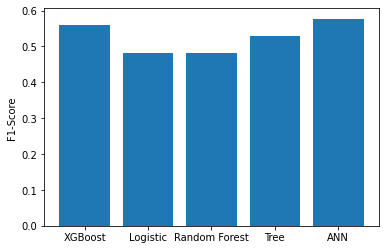

In [107]:
test_plot(test,'F1-Score')

Text(0, 0.5, 'Count of Drug Response')

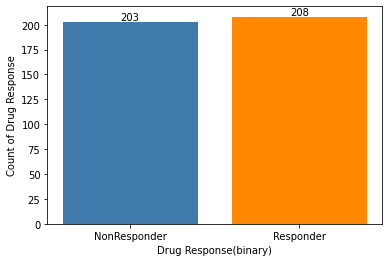

In [108]:
x = ['NonResponder','Responder']
y = [203,208]
c = ['#3F7AAB','#FF8800']
fig, ax = plt.subplots()

bars = ax.bar(x,y,color=c)
ax.bar_label(bars)
ax.set_xlabel('Drug Response(binary)')
ax.set_ylabel('Count of Drug Response')